<a href="https://colab.research.google.com/github/pulkit02s/Single-Cell-data-analysis/blob/main/SNV_standard_analysis_pipeline_v2_mean_and_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy
!pip install kneed
!pip install leidenalg

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading data from the previously implemented standard analysis pipeline
results_file = '/content/drive/MyDrive/RESULTS.h5ad'
adata = sc.read(results_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 12931 × 1586
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# PLOTS

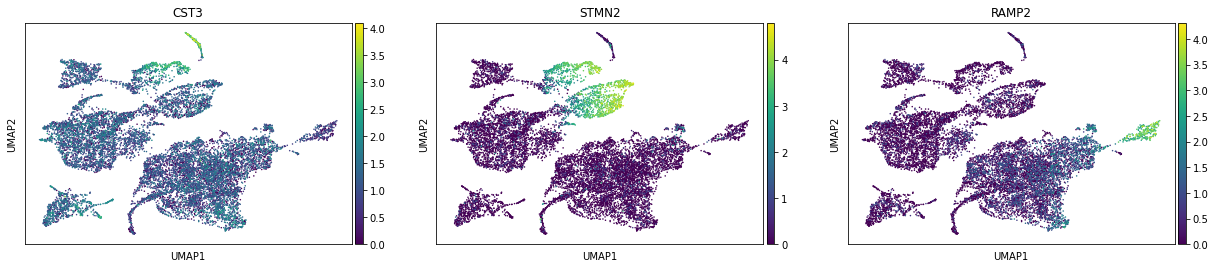

In [5]:
sc.pl.umap(adata, color=['CST3', 'STMN2', 'RAMP2']) #REPLACE/ADD THE NAME OF THE GENE TO VISUALISE ITS GENE EXPRESSION

In [6]:
# sc.tl.tsne(adata, n_pcs = 20)
# sc.pl.tsne(adata, color=['CST3', 'STMN2', 'RAMP2']) #REPLACE/ADD THE NAME OF THE GENE TO VISUALISE ITS GENE EXPRESSION

In [7]:
sc.tl.leiden(adata, resolution = 0.5)

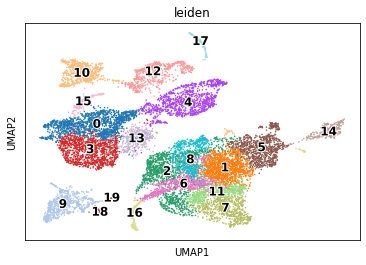

In [8]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2)

# Loading mutated dataset after handling NaN values

In [9]:
data1=pd.read_csv('/content/drive/MyDrive/filtered2.tsv',sep='\t', index_col = 'SNV')

In [10]:
data1 = data1.T

In [11]:
adata1 = sc.AnnData(data1.loc[adata.obs.index, :])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [12]:
sc.pp.filter_genes(adata1, min_cells=1)

In [13]:
sc.pp.normalize_total(adata1, target_sum=1)

In [14]:
sc.pp.highly_variable_genes(adata1, min_mean=0, max_mean=0.0015, min_disp=-0.5)

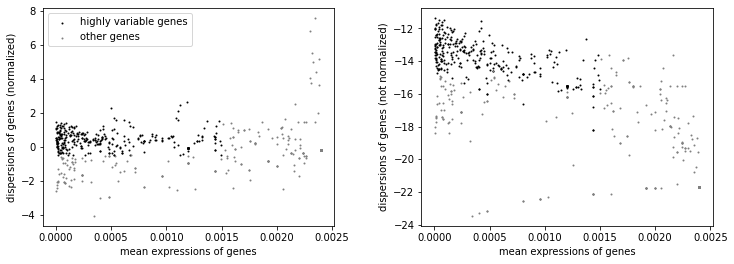

In [15]:
sc.pl.highly_variable_genes(adata1)

In [16]:
adata1 = adata1[:, adata1.var.highly_variable]

In [17]:
sc.tl.pca(adata1, svd_solver='arpack')

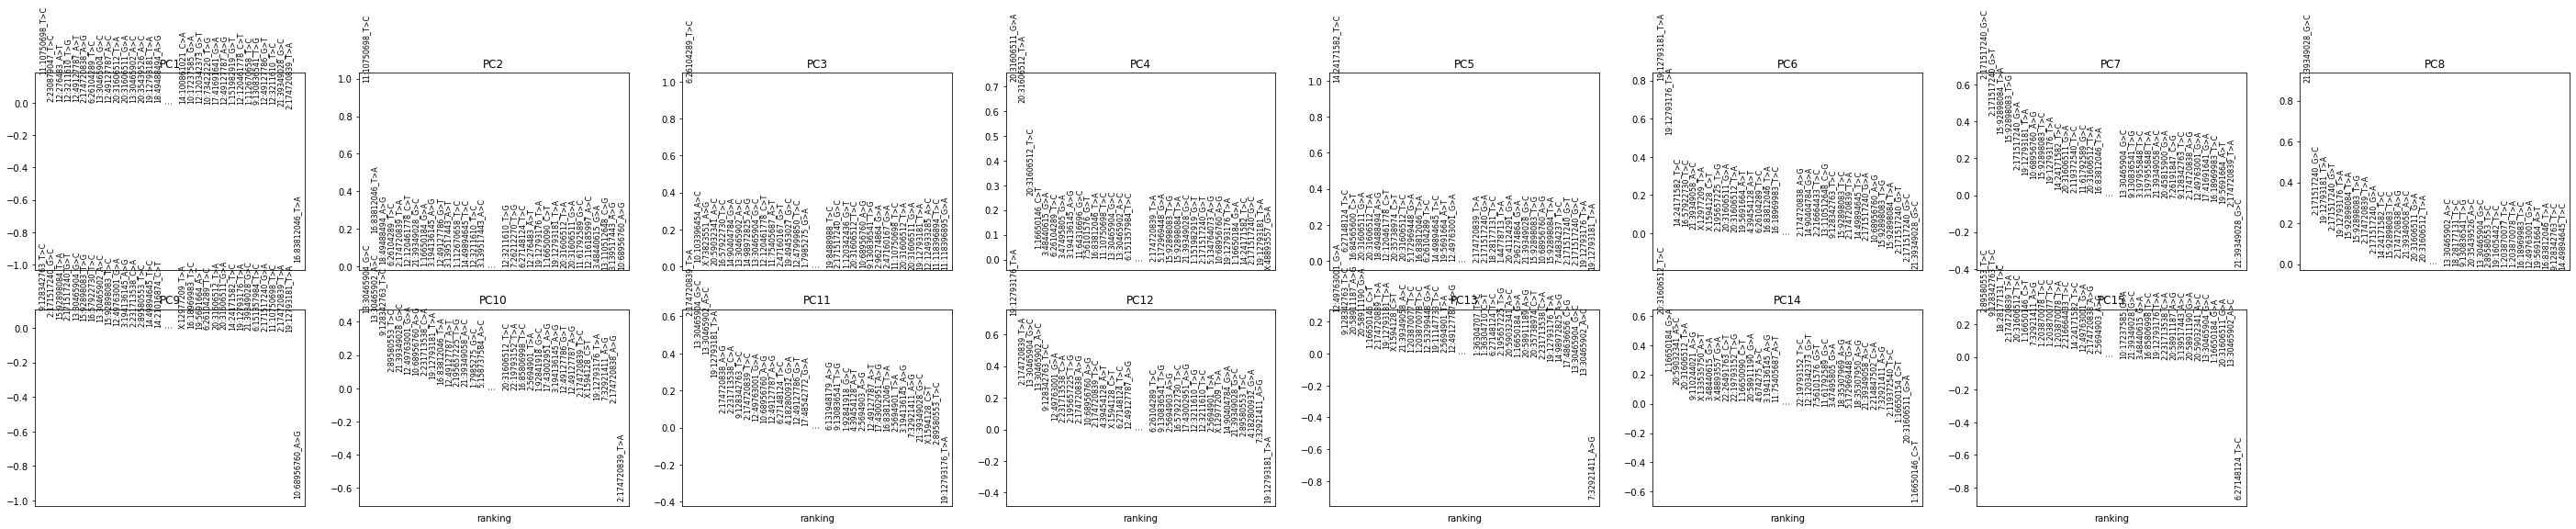

In [18]:
sc.pl.pca_loadings(adata1,  components = [i+1 for i in range (15)])

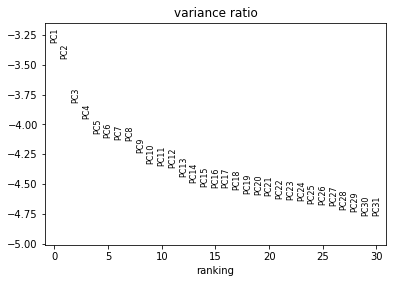

In [19]:
sc.pl.pca_variance_ratio(adata1, log=True)

In [20]:
sc.pp.neighbors(adata1, n_neighbors=10, n_pcs = 20)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


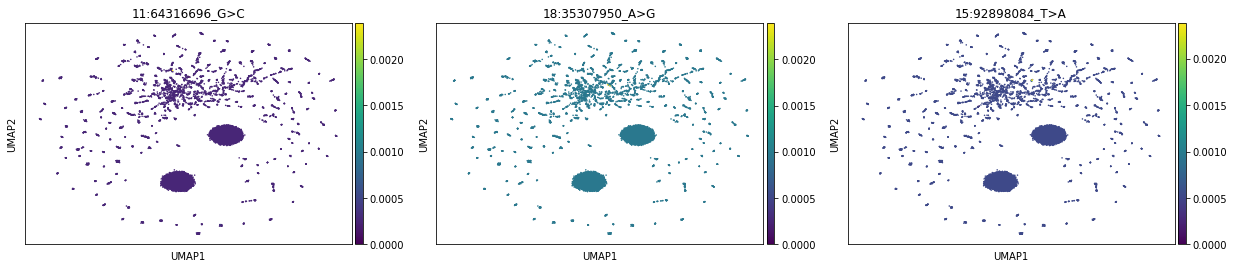

In [21]:
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['11:64316696_G>C', '18:35307950_A>G', '15:92898084_T>A'])

In [22]:
# sc.tl.tsne(adata1)
# sc.pl.tsne(adata1, color=['11:10750698_T>C', '6:26104289_T>C', '14:24171582_T>C'])

In [23]:
sc.tl.leiden(adata1, resolution = 0.00001)

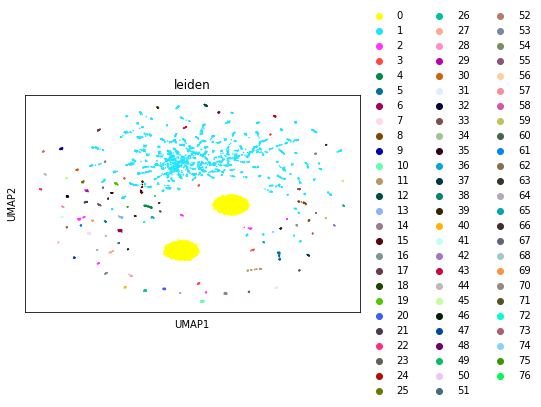

In [24]:
sc.pl.umap(adata1, color=['leiden'])

In [25]:
adata1.obs['leiden1'] = adata.obs['leiden']

In [26]:
markers = adata1.var.index
markers.tolist() # here take the "important mutations" (?) instead of all 

['1:7985275_G>A',
 '1:7985275_G>C',
 '1:16650090_C>T',
 '1:16650146_C>T',
 '1:16650154_C>T',
 '1:16650184_G>A',
 '1:23696414_T>C',
 '1:28769005_G>A',
 '1:29016491_A>C',
 '1:32680600_T>C',
 '1:35921629_T>A',
 '1:36304707_T>C',
 '1:36304710_C>T',
 '1:44778713_T>A',
 '1:46316772_G>A',
 '1:46316772_G>C',
 '1:46316773_C>A',
 '1:71081018_A>C',
 '1:92822420_G>C',
 '1:92841918_G>A',
 '1:92841918_G>C',
 '1:112670658_T>C',
 '1:119744212_C>T',
 '1:120342436_G>T',
 '1:151982919_G>T',
 '1:153897713_A>G',
 '1:165655616_T>C',
 '1:203870077_T>C',
 '1:203870078_T>A',
 '1:203870078_T>C',
 '1:228099056_G>A',
 '1:244835694_T>G',
 '10:1040234_C>T',
 '10:17237585_G>A',
 '10:17237585_G>C',
 '10:32293109_C>T',
 '10:47707105_A>G',
 '10:68956760_A>G',
 '10:70883766_A>G',
 '10:73422220_T>G',
 '10:97458515_C>T',
 '10:101106083_A>G',
 '10:103396454_A>C',
 '11:10750698_T>C',
 '11:46383800_A>G',
 '11:46383800_A>T',
 '11:57743031_A>G',
 '11:61792589_G>C',
 '11:64316696_G>C',
 '11:65854837_A>G',
 '11:65921525_T>C',
 '

In [27]:
len(markers)

306

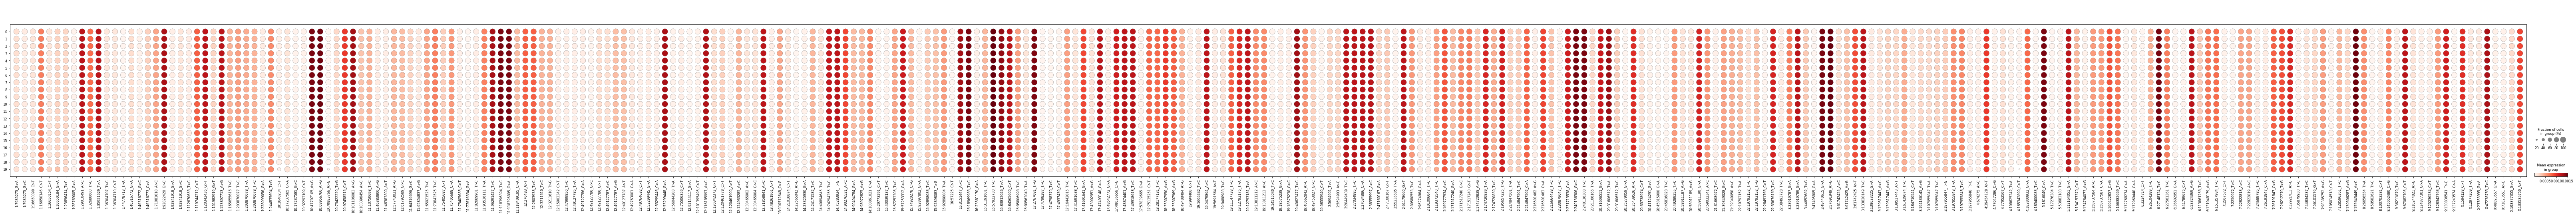

In [28]:
sc.pl.dotplot(adata1, markers, groupby='leiden1');
#this is the "contribution" of mutations in clusters BASED ON GENE EXPRSSION (we've copied the SAME leiden column)
#WE COULD HAVE also plotted the "contribution" of mutations in clusters BASED ON mutations only
#we have plotted the dotplot for all the mutations for reference, one can also only plot the mutations that seem to be having more biological significance

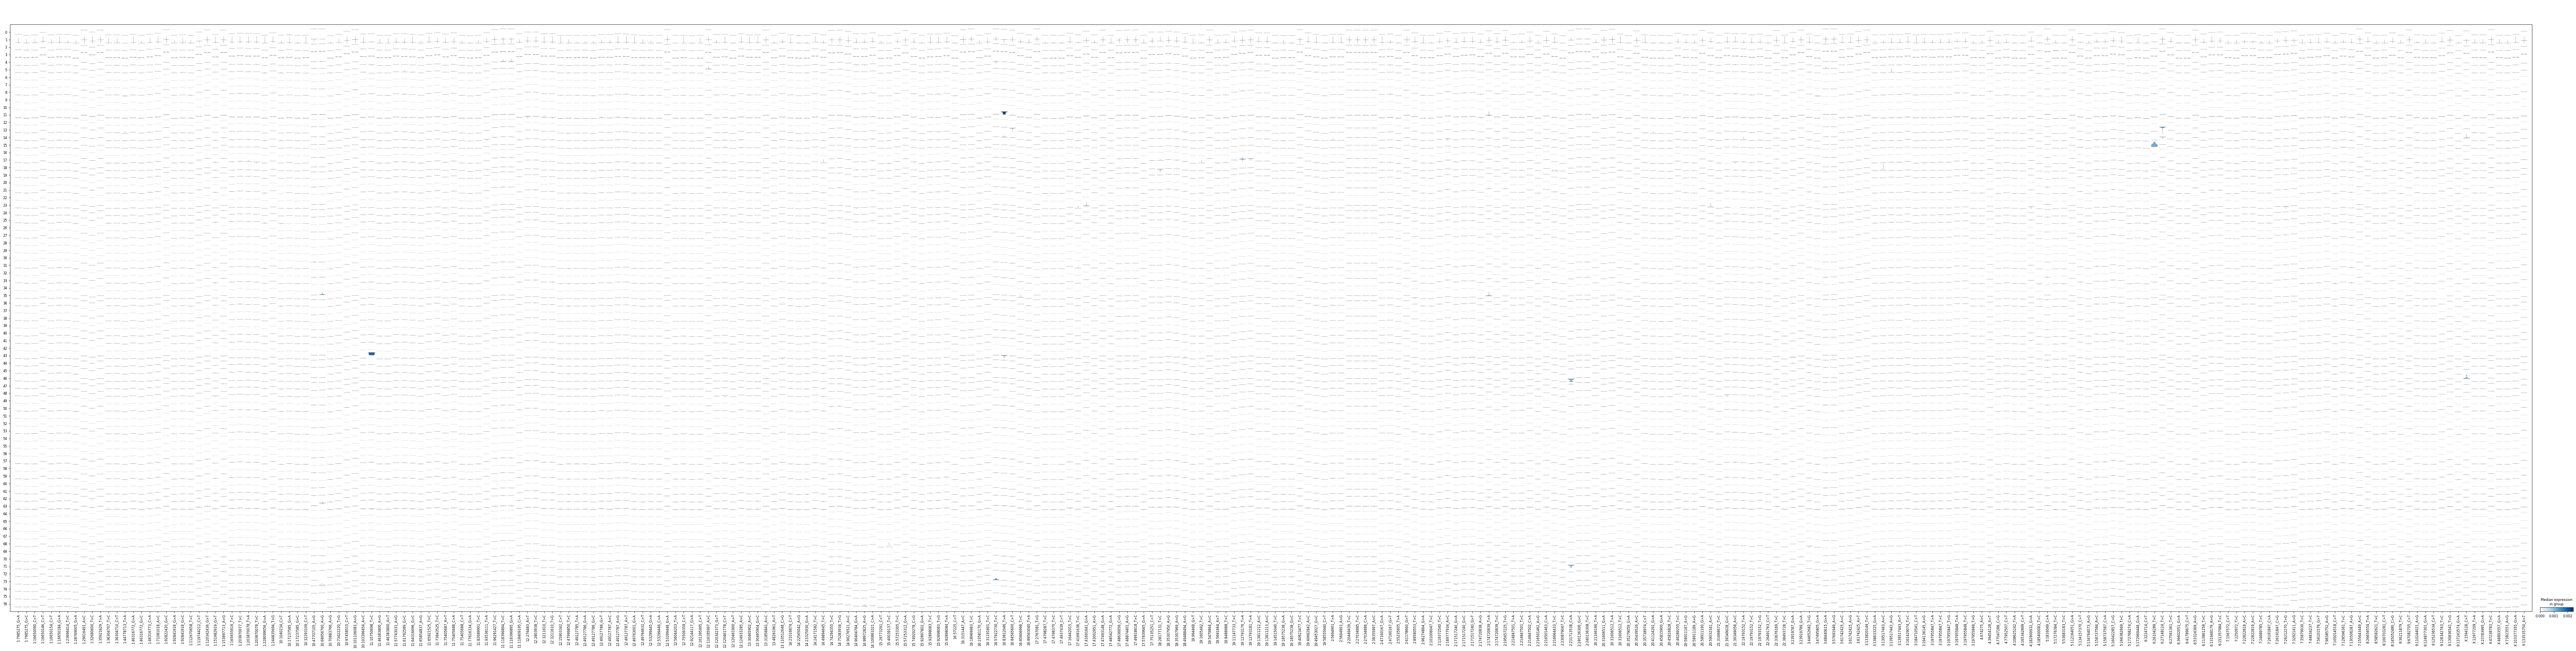

In [29]:
# sc.pl.stacked_violin(adata1, markers, groupby='leiden', rotation=90);